# Enunciado
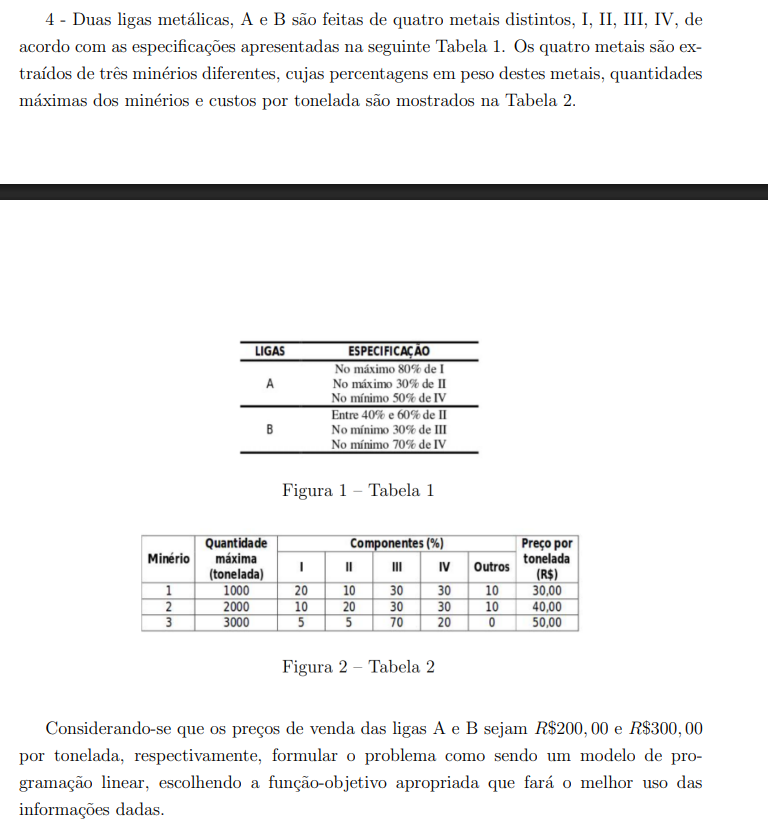

In [ ]:
import gurobipy as gp
from gurobipy import GRB

#  Modelo
m = gp.Model("Lucro_Ligas")

# Variáveis 
x = m.addVars(3, name="MinA")  # Minerios na Liga A
y = m.addVars(3, name="MinB")  # Minerios na Liga B

# Função Objetivo 
m.setObjective(
    170*x[0] + 160*x[1] + 150*x[2] +
    270*y[0] + 260*y[1] + 250*y[2],
    GRB.MAXIMIZE
)

# Restrições 
# Limite de matéria-prima
for i, lim in enumerate([1000, 2000, 3000]):
    m.addConstr(x[i] + y[i] <= lim, f"limite_minerio{i+1}")

# Liga A
A = x[0] + x[1] + x[2]
m.addConstr(0.20*x[0] + 0.10*x[1] + 0.05*x[2] <= 0.80*A, "comp1_A")
m.addConstr(0.10*x[0] + 0.20*x[1] + 0.05*x[2] <= 0.30*A, "comp2_A")
m.addConstr(0.30*x[0] + 0.30*x[1] + 0.20*x[2] >= 0.25*A, "comp4_A")

# Liga B
B = y[0] + y[1] + y[2]
m.addConstr(0.10*y[0] + 0.20*y[1] + 0.05*y[2] >= 0.40*B, "comp2_B_min")
m.addConstr(0.10*y[0] + 0.20*y[1] + 0.05*y[2] <= 0.60*B, "comp2_B_max")
m.addConstr(0.30*y[0] + 0.30*y[1] + 0.70*y[2] >= 0.30*B, "comp3_B")
m.addConstr(0.30*y[0] + 0.30*y[1] + 0.20*y[2] >= 0.15*B, "comp4_B")

# Otimizar 
m.optimize()

#  Resultados 
if m.status == GRB.OPTIMAL:
    print("\n" + "-"*50)
    print("SOLUÇÃO ÓTIMA ENCONTRADA")
    print("-"*50)
    print(f"Lucro Máximo Total: R$ {m.objVal:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
    print("-"*50)

    print("PLANO DE PRODUÇÃO ÓTIMO:")
    for v in m.getVars():
        if v.x > 1e-6:
            print(f"  - {v.VarName}: {v.x:,.2f} toneladas".replace(",", "."))
    
    print("-"*50)
    print("TOTAIS PRODUZIDOS:")
    print(f"  - Total Liga A: {A.getValue():,.2f} toneladas".replace(",", "."))
    print(f"  - Total Liga B: {B.getValue():,.2f} toneladas".replace(",", "."))
    print("-"*50)


# Resultados
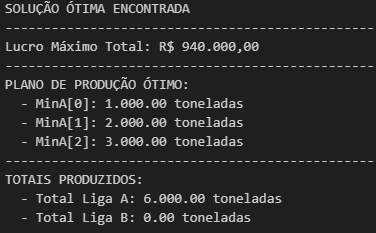